In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [139]:
df=pd.read_csv('../dataset/Mall_Customers.csv')

In [140]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Location
0,1,Male,19,15,39,East
1,2,Male,21,15,81,North
2,3,Female,20,16,6,East
3,4,Female,23,16,77,West
4,5,Female,31,17,40,South


In [114]:
#Statastical Information 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Unnamed: 5
count,200.000000,200.000000,200.000000,200.000000,0.0
mean,100.500000,38.850000,60.560000,50.200000,NaN
std,57.879185,13.969007,26.264721,25.823522,NaN
min,1.000000,18.000000,15.000000,1.000000,NaN
25%,50.750000,28.750000,41.500000,34.750000,NaN
50%,100.500000,36.000000,61.500000,50.000000,NaN
75%,150.250000,49.000000,78.000000,73.000000,NaN
max,200.000000,70.000000,137.000000,99.000000,NaN


In [115]:
#datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    int64  
 4   Spending Score (1-100)  200 non-null    int64  
 5   Unnamed: 5              0 non-null      float64
 6   Location                200 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 11.1+ KB


<Axes: xlabel='count', ylabel='Gender'>

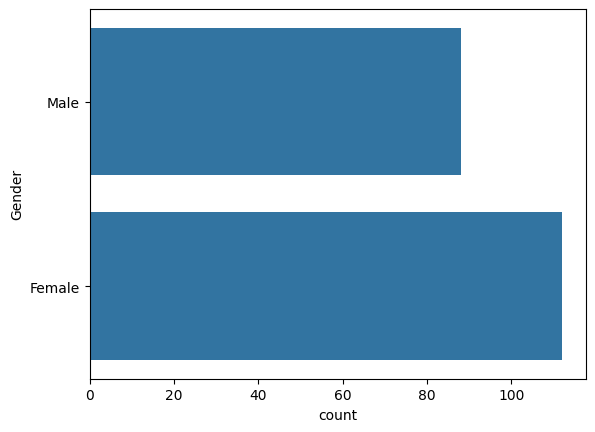

In [116]:
#Exploratory Data Analysis
sns.countplot(df['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

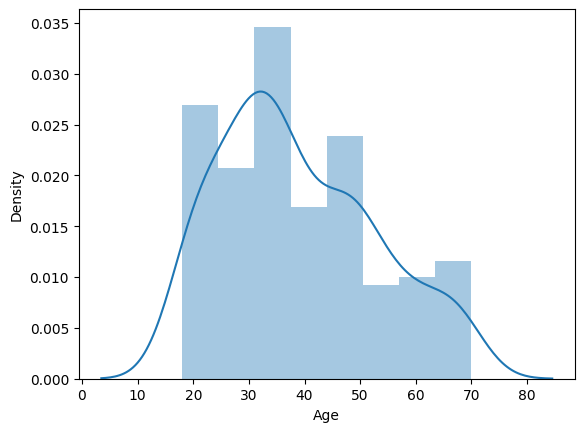

In [117]:
sns.distplot(df['Age'])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

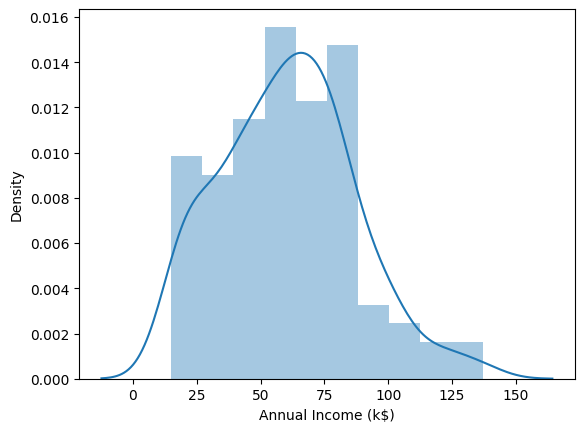

In [118]:
sns.distplot(df['Annual Income (k$)'])

<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

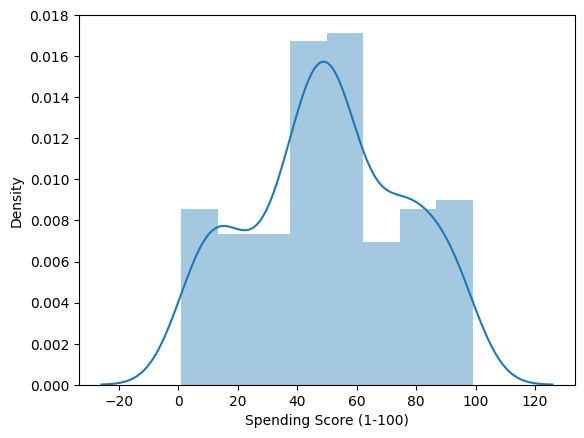

In [119]:
sns.distplot(df['Spending Score (1-100)'])

In [141]:
# Correlation Matrix
if 'Gender' in df.columns:
    lable_encoder = LabelEncoder()
    df['Gender'] = lable_encoder.fit_transform(df['Gender'])
if 'Location' in df.columns:
    label_encoder = LabelEncoder()
    df['Location'] = label_encoder.fit_transform(df['Location'])

<Axes: >

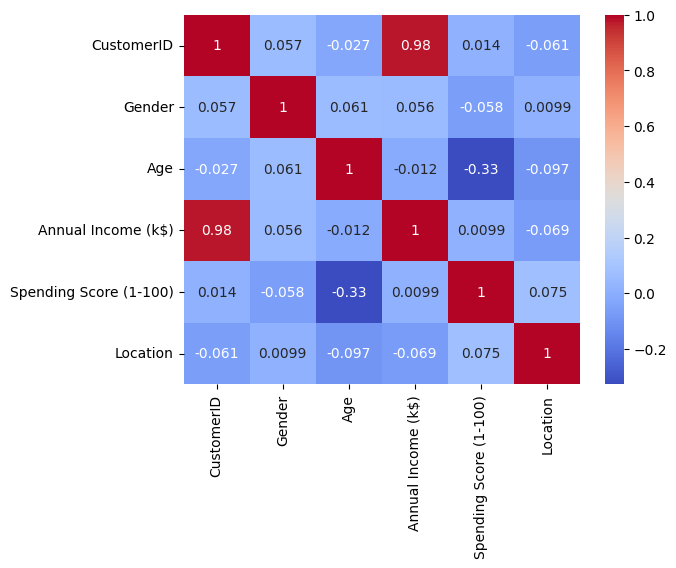

In [142]:
corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [143]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Location
0,1,1,19,15,39,0
1,2,1,21,15,81,1
2,3,0,20,16,6,0
3,4,0,23,16,77,3
4,5,0,31,17,40,2


In [144]:
#Clustering on 2 features
df1=df[['Annual Income (k$)','Spending Score (1-100)']]

In [145]:
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

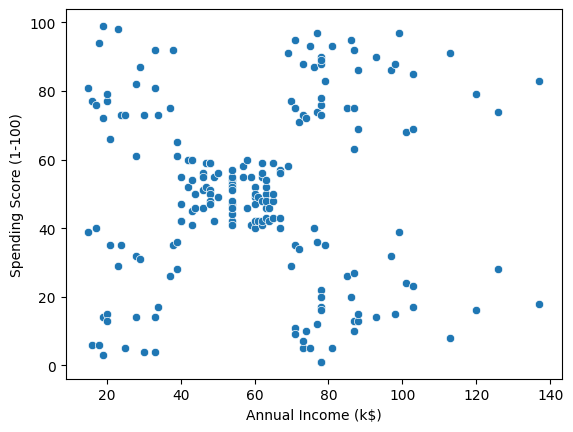

In [146]:
#Scatter Plot
sns.scatterplot(x=df1['Annual Income (k$)'],y=df1['Spending Score (1-100)'])


In [147]:
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

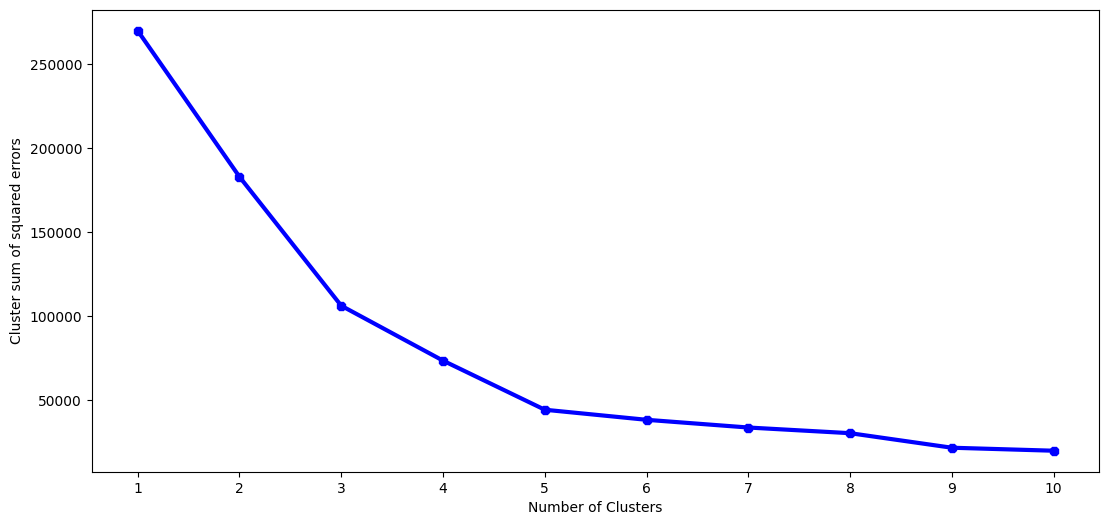

In [148]:
#plot results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors,linewidth=3, color='blue', marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster sum of squared errors')
plt.xticks(np.arange(1,11,1))
plt.show()

In [151]:
km=KMeans(n_clusters=5)
km.fit(df1)
y=km.predict(df1)
df1['Label']=y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

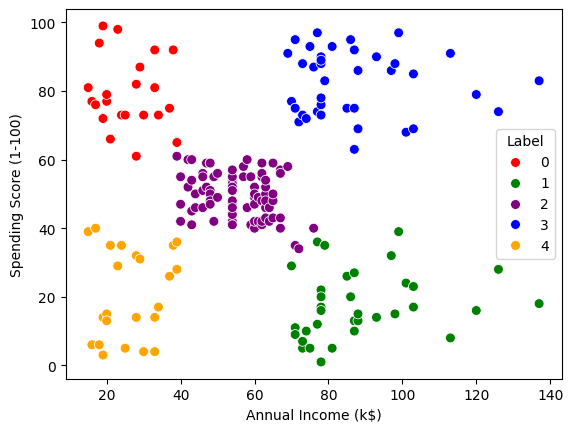

In [152]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1, hue='Label', s=50, palette=['red','green', 'purple', 'blue', 'orange'])

In [153]:
#cluster on 3features
df2=df[['Annual Income (k$)','Spending Score (1-100)','Age']]

In [154]:
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [155]:
errors=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

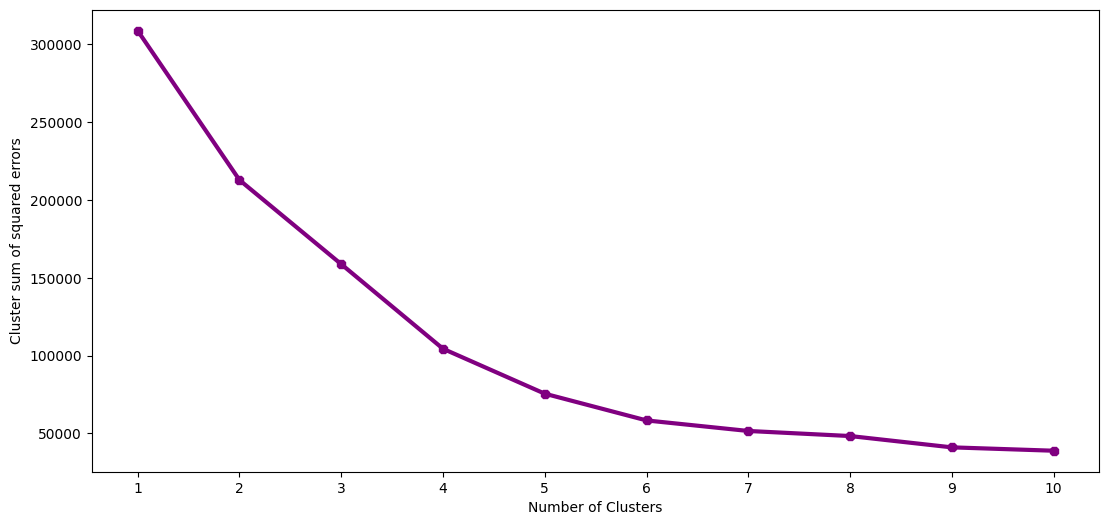

In [156]:
#plot results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11),errors,linewidth=3, color='purple', marker='8')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster sum of squared errors')
plt.xticks(np.arange(1,11,1))
plt.show()

In [159]:
km=KMeans(n_clusters=5)
km.fit(df2)
y=km.predict(df2)
df2['Label']=y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,2
1,15,81,21,2
2,16,6,20,1
3,16,77,23,2
4,17,40,31,1


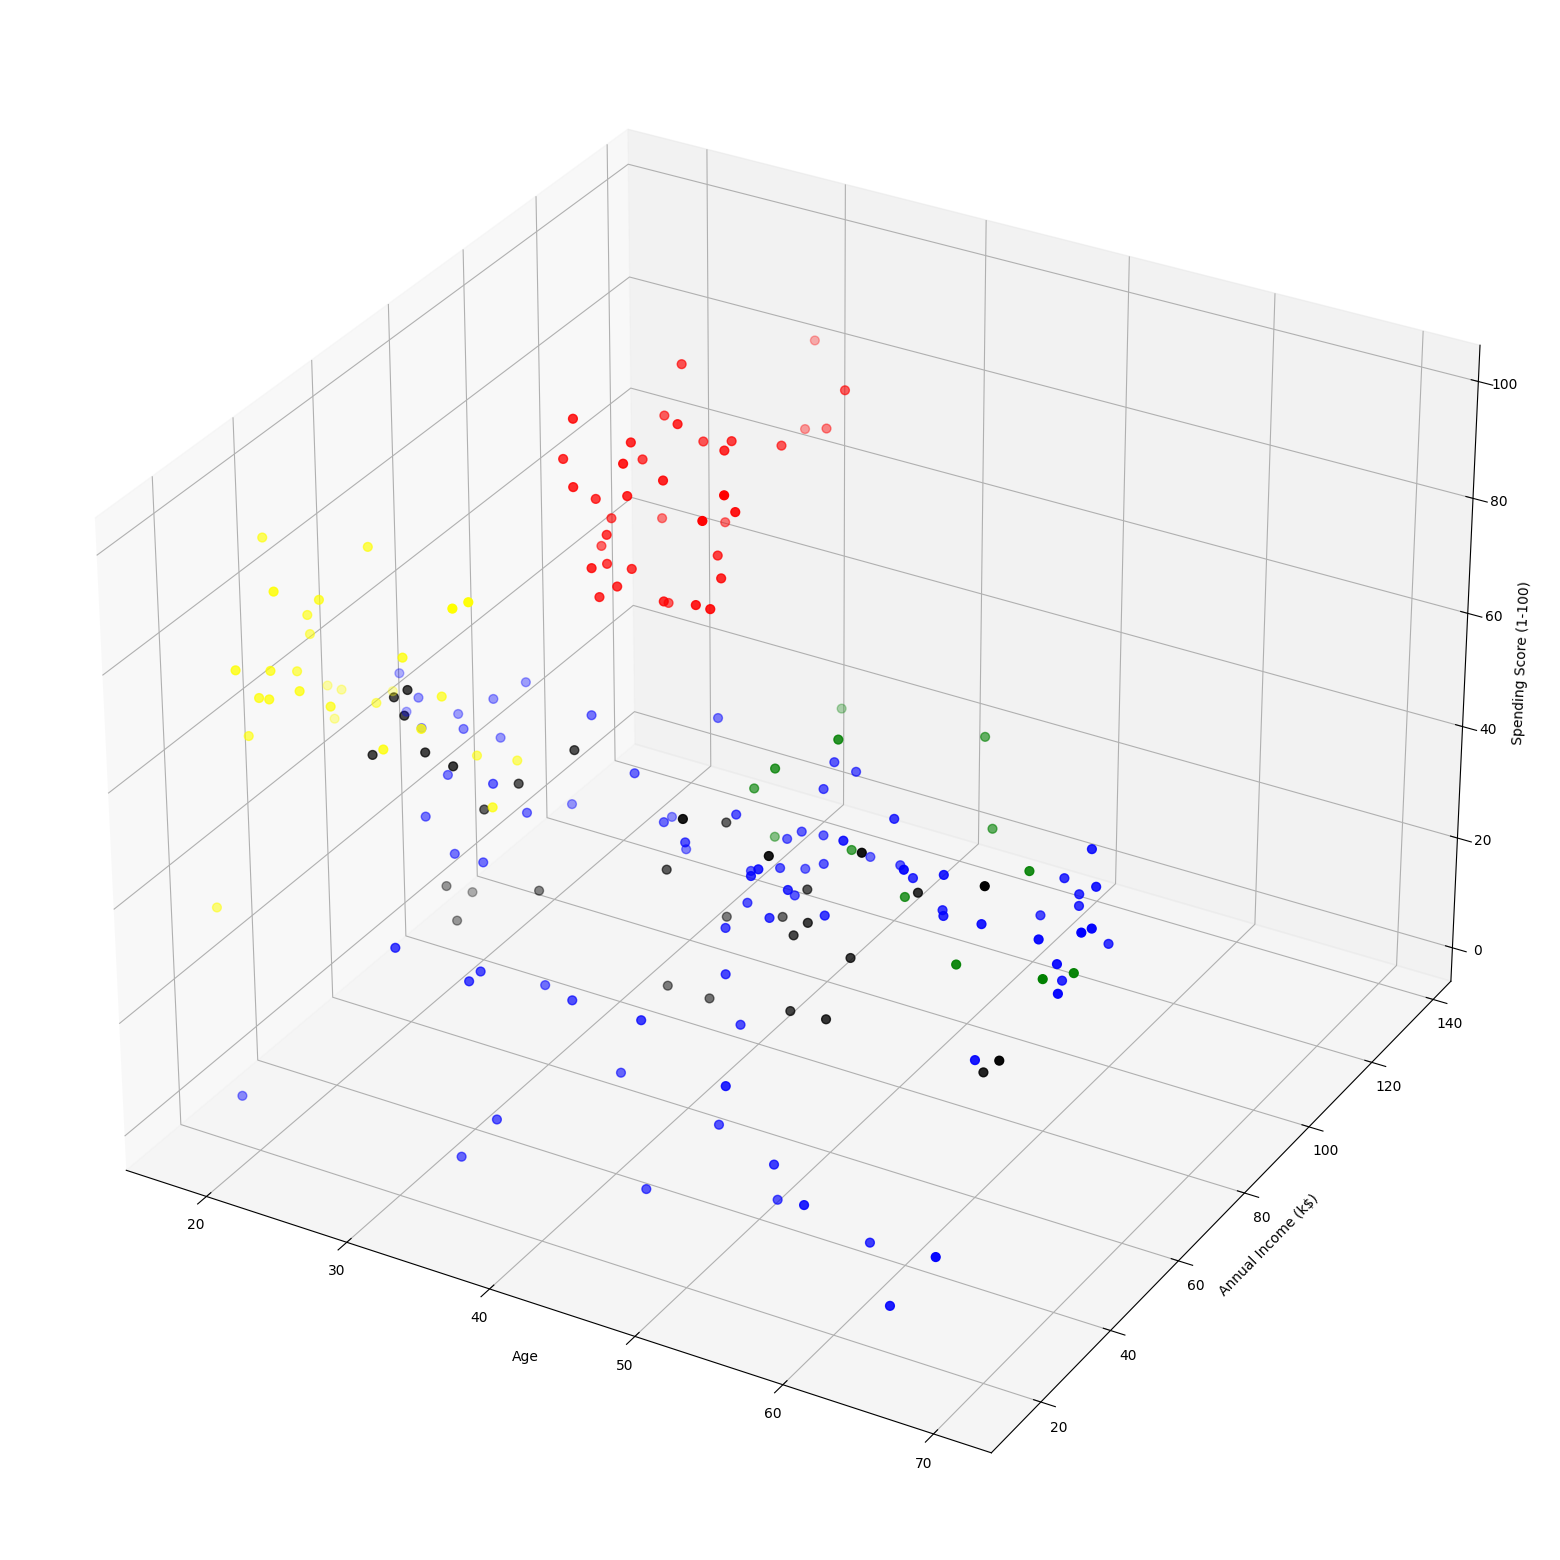

In [160]:
#3d scatter plot
fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(df2['Age'][df2['Label']==0],df2['Annual Income (k$)'][df2['Label']==0],df2['Spending Score (1-100)'][df2['Label']==0], c='red',s=40)
ax.scatter(df2['Age'][df2['Label']==1],df2['Annual Income (k$)'][df2['Label']==1],df2['Spending Score (1-100)'][df2['Label']==1], c='blue',s=40)
ax.scatter(df2['Age'][df2['Label']==2],df2['Annual Income (k$)'][df2['Label']==2],df2['Spending Score (1-100)'][df2['Label']==2], c='yellow',s=40)
ax.scatter(df2['Age'][df2['Label']==3],df2['Annual Income (k$)'][df2['Label']==3],df2['Spending Score (1-100)'][df2['Label']==3], c='green',s=40)
ax.scatter(df2['Age'][df2['Label']==4],df2['Annual Income (k$)'][df2['Label']==4],df2['Spending Score (1-100)'][df2['Label']==4], c='black',s=40)
#ax.view_init(40,190)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

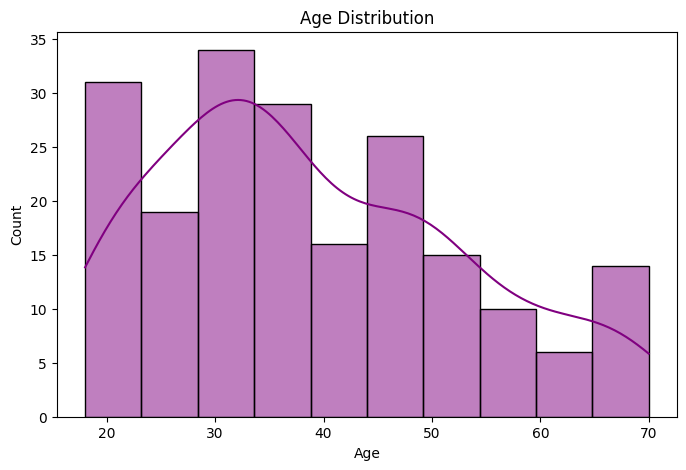

In [161]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

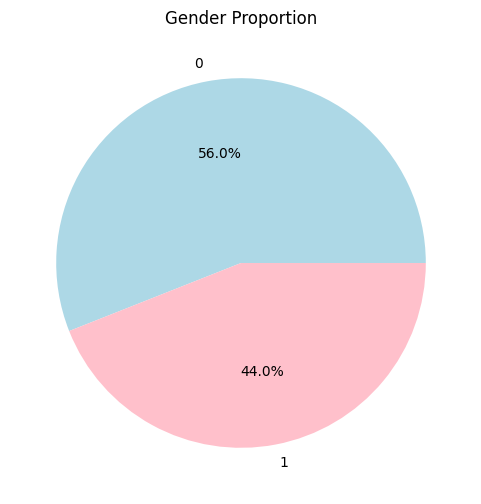

In [162]:
# Gender Proportion
plt.figure(figsize=(6, 6))
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()

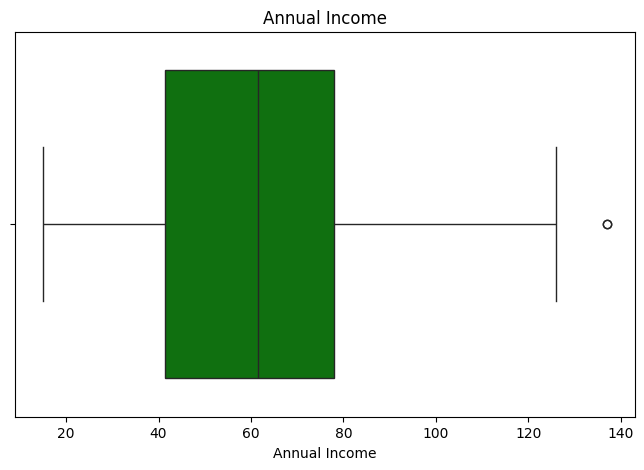

In [163]:
# Income Levels
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Annual Income (k$)'], color='green')
plt.title('Annual Income')
plt.xlabel('Annual Income')
plt.show()

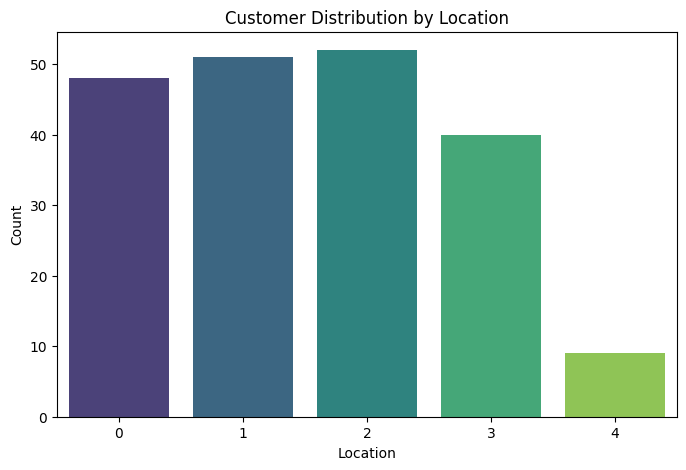

In [164]:
# Grouping Customers by Location
location_counts = df['Location'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Customer Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

In [166]:
# Display Summary Statistics
summary = df.groupby(['Location', 'Gender'])['Annual Income (k$)'].agg(['mean', 'median', 'count'])
print("\nDemographic Analysis Summary:\n", summary)


Demographic Analysis Summary:
                       mean  median  count
Location Gender                          
0        0       58.392857    54.0     28
         1       68.700000    69.0     20
1        0       60.423077    61.5     26
         1       58.000000    61.0     25
2        0       57.032258    60.0     31
         1       63.571429    71.0     21
3        0       66.478261    70.0     23
         1       70.882353    63.0     17
4        0       33.250000    24.0      4
         1       22.400000    23.0      5
